<a href="https://colab.research.google.com/github/anmolaman20/DataScience_DailyLearning/blob/main/Descision_Boundary_Code_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Important Visualization Technique for All Classification Algorithms

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [17]:
df = pd.read_csv('Social_Network_Ads.csv')

In [18]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
df.drop(columns=['User ID','Gender'],inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [20]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Purchased']),df['Purchased'],test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((320, 2), (80, 2))

In [21]:
scaler = StandardScaler()

X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_Scaled,y_train)
y_predicted = knn.predict(X_test)

print(accuracy_score(y_test,y_predicted))

0.35


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [24]:
a = np.arange(start=X_train_Scaled[:,0].min()-1, stop=X_train_Scaled[:,0].max()+1,step=0.01)
b = np.arange(start=X_train_Scaled[:,1].min()-1, stop=X_train_Scaled[:,1].max()+1,step=0.01)

In [25]:
a.shape, b.shape

((613,), (593,))

In [26]:
XX,YY = np.meshgrid(a,b)
XX.shape, YY.shape

((593, 613), (593, 613))

In [29]:
input_values = np.array([XX.ravel(),YY.ravel()]).T
predicted_values = knn.predict(input_values)

In [30]:
predicted_values

array([0, 0, 0, ..., 1, 1, 1])

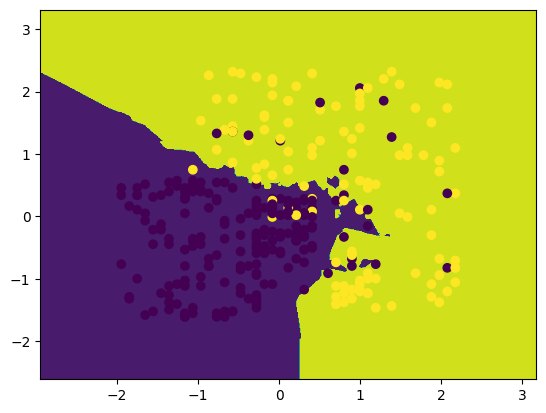

In [39]:
import matplotlib.pyplot as plt
plt.contourf(XX,YY,predicted_values.reshape(XX.shape))
plt.scatter(X_train_Scaled[:,0],X_train_Scaled[:,1],c=y_train)